In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
efw_data = pd.read_excel("Economic Freedom Of The World Dataset 2023.xlsx")
efw_data.head()
# Data shown below has the first 4 rows full of null data, code below will delete the rows that are null

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A,NaN,...,NaN,NaN,5D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5Civ,NaN,5Di,5Dii,5Diii,NaN,NaN,NaN,NaN,NaN
3,NaN,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,...,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank,World Bank Region,"World Bank Current Income Classification, 1990..."
4,NaN,2021,AL,ALB,Albania,7.6,31,1,7.758824,13.62,...,3.587625,5.312221,6.810619,5.62194,6.25,6.22752,6.972552,51,Europe & Central Asia,UM


In [5]:
efw_data = efw_data.drop(efw_data.index[:3])

In [6]:
efw_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
3,NaN,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,...,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank,World Bank Region,"World Bank Current Income Classification, 1990..."
4,NaN,2021,AL,ALB,Albania,7.6,31,1,7.758824,13.62,...,3.587625,5.312221,6.810619,5.62194,6.25,6.22752,6.972552,51,Europe & Central Asia,UM
5,NaN,2021,DZ,DZA,Algeria,4.82,157,4,3.467647,28.21,...,4.764764,3.735188,4.41243,8.771111,3.134281,5.439274,4.836754,150,Middle East & North Africa,LM
6,NaN,2021,AO,AGO,Angola,5.38,149,4,7.179412,15.59,...,4.641462,4.285256,3.099164,7.916416,1.25,4.088527,4.730618,153,Sub-Saharan Africa,LM
7,NaN,2021,AR,ARG,Argentina,4.77,158,4,5.691176,20.65,...,4.504147,4.862998,6.144822,5.726521,2.922359,4.931234,5.299677,143,Latin America & the Caribbean,UM


In [7]:
# Set the first row as the header
efw_data.columns = efw_data.iloc[0]

In [ ]:
# Remove the first row
efw_data = efw_data[1:].reset_index(drop=True)

In [ ]:
# Drops the first column because it consists of nulls
efw_data = efw_data.dropna(axis=1, how='all')

In [ ]:
# Changes the first cell to 'Year'
efw_data.columns = ['Year'] + list(efw_data.columns[1:])

In [ ]:
efw_data.head()

In [ ]:
efw_data.isnull()

In [71]:
# There are many countries with null values such as Vietnam, there cannot be mean or mode imputations so those rows will just get dropped
efw_data[efw_data.isnull().any(axis=1)]

,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,1B Transfers and subsidies,...,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank,World Bank Region,"World Bank Current Income Classification, 1990-present"
8,2021,BS,BHS,"Bahamas, The",6.55,93,3,6.114706,19.21,7.967302,...,6.631277,6.204527,8.004065,7.982034,6.25,7.412033,6.884125,54,Latin America & the Caribbean,H
11,2021,BB,BRB,Barbados,6.94,72,2,7.685294,13.87,6.645777,...,6.149276,5.891138,5.477763,4.999638,8.75,6.409134,7.053086,47,Latin America & the Caribbean,H
12,2021,BY,BLR,Belarus,6.23,109,3,4.597059,24.37,5.722071,...,5.782244,4.166489,5.555652,8.339497,1.25,5.048383,5.511742,137,Europe & Central Asia,UM
14,2021,BZ,BLZ,Belize,5.91,126,4,5.461765,21.43,8.43126,...,7.926115,5.436594,5.150726,8.599076,5,6.249934,6.686046,75,Latin America & the Caribbean,LM
15,2021,BJ,BEN,Benin,6.41,98,3,7.941176,13,9.771475,...,4.736741,5.317322,4.293807,9.475695,3.75,5.839834,6.786517,64,Sub-Saharan Africa,LM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,1970,VE,VEN,"Venezuela, RB",7.29,14,1,6.602003,17.553191,9.82743,...,NaN,6.335,NaN,NaN,NaN,NaN,6.545577,35,Latin America & the Caribbean,NaN
4616,1970,VN,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.55,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,NaN
4617,1970,YE,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0175,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa,NaN
4618,1970,ZM,ZMB,Zambia,5.26,61,3,3.448131,28.276353,9.10543,...,NaN,6.0675,NaN,NaN,NaN,NaN,6.697414,32,Sub-Saharan Africa,NaN


In [51]:
efw_data_cleaned = efw_data.dropna()

In [52]:
# Check once again to see if there are null values
efw_data_cleaned.isnull().sum().sum()

0

In [63]:
# Exports the cleaned data for further visualization in Power BI
efw_data_cleaned.to_excel('new_cleaned_EFW_data.xlsx', index=False)

In [64]:
print(efw_data_cleaned.columns)

Index(['Year', 'ISO Code 2', 'ISO Code 3', 'Countries',
       'Economic Freedom Summary Index', 'Rank', 'Quartile',
       '1A Government consumption', 'data', '1B  Transfers and subsidies',
       'data', '1C  Government investment', 'data',
       '1Di Top marginal income tax rate', 'data',
       '1Dii Top marginal income and payroll tax rate', 'data',
       '1D  Top marginal tax rate', 'IE State ownership',
       '1  Size of Government', 'Area 1 Rank', '2A  Judicial independence',
       '2B  Impartial courts', '2C  Property rights',
       '2D  Military interference', '2E Legal integrity', '2F Contracts',
       '2G Real property', '2H Police and crime', 'Gender Disparity Index',
       '2  Legal System & Property Rights -- With Gender Adjustment',
       'Area 2 Rank',
       '2 Legal System & Property Rights - No Gender Adjustment',
       '3A  Money growth', 'data', '3B  Standard deviation of inflation',
       'data', '3C  Inflation', 'data', '3D  Foreign currency bank acco

In [104]:
# Setting up independent and dependent variables for regression modeling
X = efw_data_cleaned[['1A Government consumption', '5Di  Market openness', '4D  Controls of the movement of capital and people','3A  Money growth']]  # Independent variable
Y = efw_data_cleaned['Economic Freedom Summary Index']  # Dependent variable

In [105]:
# Splits data into sets for testing and training (test size parameter defines 30% of data will be tested while the rest 
# will be used for training)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [106]:
# Prints the shapes of training and testing sets --> 373 rows will be used for training and 160 rows will be used for testing
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (373, 4)
X_test shape: (160, 4)
Y_train shape: (373,)
Y_test shape: (160,)


In [107]:
# Check data types of the independent variables
print(X_train.dtypes)

# Check data types of the dependent variable
print(Y_train.dtypes)

1A Government consumption                             object
5Di  Market openness                                  object
4D  Controls of the movement of capital and people    object
3A  Money growth                                      object
dtype: object
object


In [108]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)

In [109]:
# Check data types of the independent variables
print(X_train.dtypes)

# Check data types of the dependent variable
print(Y_train.dtypes)

1A Government consumption                             int64
5Di  Market openness                                  int64
4D  Controls of the movement of capital and people    int64
3A  Money growth                                      int64
dtype: object
int64


In [111]:
# Add a constant (intercept) so there is a baseline value for Y when X is 0
X_train_sm = sm.add_constant(X_train)

# Fit the model with intercept
model = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Economic Freedom Summary Index   R-squared:                       0.701
Model:                                        OLS   Adj. R-squared:                  0.698
Method:                             Least Squares   F-statistic:                     215.9
Date:                            Sat, 14 Sep 2024   Prob (F-statistic):           3.72e-95
Time:                                    19:09:46   Log-Likelihood:                -315.65
No. Observations:                             373   AIC:                             641.3
Df Residuals:                                 368   BIC:                             660.9
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                                         coef    std err          t      P

In [112]:
# With the R-squared being 0.701, it shows that 70.1% of the variance for the dependent variable is explained by the 
# independent variables
# The F statistic being 215.9 indicates that the model represents that the independent variables predict the dependent variable well.

In [117]:
X_test_sm = sm.add_constant(X_test)

# Predict using the updated test data with constant with X test
Y_pred = model.predict(X_test_sm)
print(Y_pred)

6      7.483734
751    7.655844
159    7.135198
748    5.887707
695    5.909287
         ...   
171    7.232246
260    5.864323
370     7.30824
612    8.152834
82     6.693737
Length: 160, dtype: object


In [125]:
# Calculate djusted r squared 
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")
# Calculate MSE, closer to 0 better the predictions 
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.7165485904806747
Mean Squared Error: 0.21125598009325924


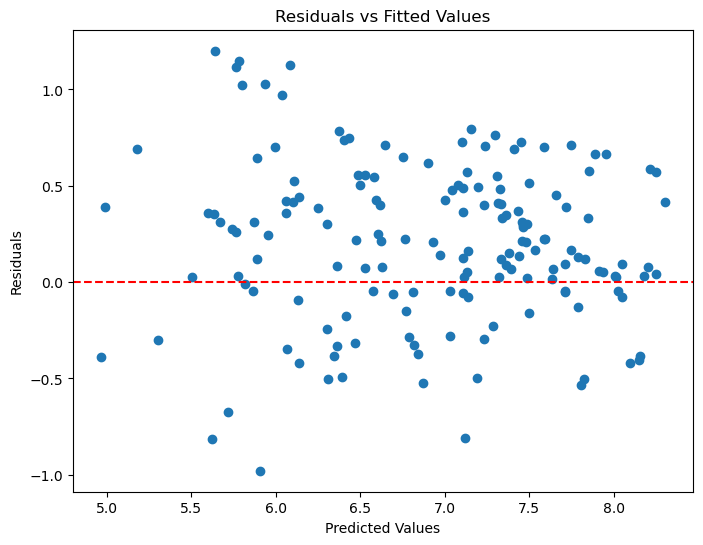

In [127]:
# Residual diagnostic to see the difference between predicted/actual values
# This checks for homoscedasticity, result- constant variance
residuals = Y_test - Y_pred

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

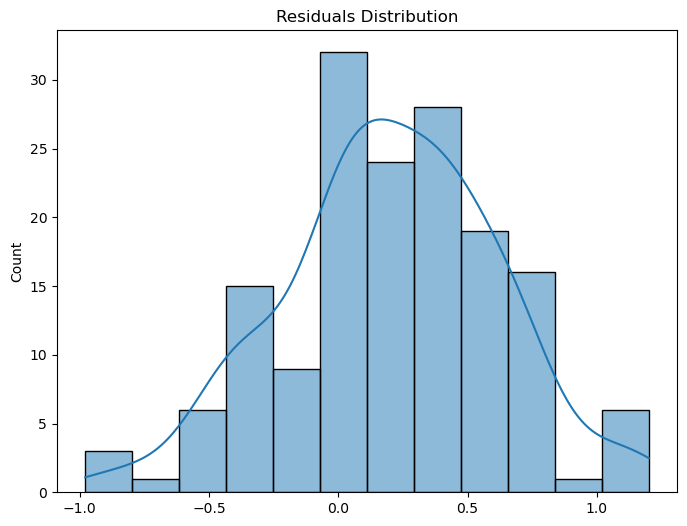

In [128]:
# This will check if residuals is normally distributed with histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [131]:
# This histogram shows that the residuals are not perfectly distributed where it suggests that a few data points are lower than expected 

In [132]:
# This will calculate the variance inflation factor (VIF) to determine the effect of individual variables
# Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                             Feature        VIF
0                          1A Government consumption   5.100346
1                               5Di  Market openness  16.692395
2  4D  Controls of the movement of capital and pe...   9.848304
3                                   3A  Money growth  18.445715


In [133]:
# From the calculated VIF, government consumption is the only variable that has no multicollinearity issue

In [143]:
X2 = efw_data_cleaned[['1B  Transfers and subsidies',
       '1C  Government investment',
       '1Di Top marginal income tax rate',
       '1Dii Top marginal income and payroll tax rate',
       '1D  Top marginal tax rate', 'IE State ownership',
       '1  Size of Government', '2A  Judicial independence',
       '2B  Impartial courts', '2C  Property rights',
       '2D  Military interference', '2E Legal integrity', '2F Contracts',
       '2G Real property', '2H Police and crime', 'Gender Disparity Index',
       '2  Legal System & Property Rights -- With Gender Adjustment',
       '2 Legal System & Property Rights - No Gender Adjustment',
       '3A  Money growth', '3B  Standard deviation of inflation',
       '3C  Inflation', '3D  Foreign currency bank accounts',
       '3  Sound Money', '4Ai  Trade tax revenue',
       '4Aii  Mean tariff rate',
       '4Aiii  Standard deviation of tariff rates', '4A  Tariffs',
       '4Bi  Non-tariff trade barriers',
       '4Bii  Costs of importing and exporting',
       '4B  Regulatory trade barriers', '4C  Black market exchange rates',
       '4Di  Financial openness', '4Dii  Capital controls',
       '4Diii Freedom of foreigners to visit',
       '4Div Protection of Foreign Assets',
       '4D  Controls of the movement of capital and people',
       '4  Freedom to trade internationally',
       '5Ai  Ownership of banks', '5Aii Private sector credit',
       '5Aiii  Interest rate controls/negative real interest rates)',
       '5A  Credit market regulation',
       '5Bi  Labor regulations and minimum wage',
       '5Bii  Hiring and firing regulations',
       '5Biii  Flexible wage determination', '5Biv  Hours Regulations',
       '5Bv Cost of worker dismissal', '5Bvi  Conscription',
       '5Bvii Foreign Labor', '5B  Labor market regulations',
       '5Ci  Regulatory Burden', '5Cii  Bureacracy costs',
       '5Ciii  Impartial Public Administration', '5Civ Tax compliance',
       '5C  Business regulations', '5Di  Market openness',
       '5Dii Business Permits', '5Diii Distorton of the business environment',
       '5D Freedom to enter markets and compete', '5  Regulation']]

In [146]:
# Due to multiple variables having a VIF higher than 10, I will remove those variables and find the VIF of other variables to create another model
X2 = X2.astype(int)
print(X2.dtypes)

1B  Transfers and subsidies                                    int64
1C  Government investment                                      int64
1Di Top marginal income tax rate                               int64
1Dii Top marginal income and payroll tax rate                  int64
1D  Top marginal tax rate                                      int64
IE State ownership                                             int64
1  Size of Government                                          int64
2A  Judicial independence                                      int64
2B  Impartial courts                                           int64
2C  Property rights                                            int64
2D  Military interference                                      int64
2E Legal integrity                                             int64
2F Contracts                                                   int64
2G Real property                                               int64
2H Police and crime               

In [145]:
X2_with_const = sm.add_constant(X2)

# Create a DataFrame to hold the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X2_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2_with_const.values, i) for i in range(X2_with_const.shape[1])]

# Print the VIF data
print(vif_data)

                                              Feature         VIF
0                                               const  514.623355
1                         1B  Transfers and subsidies    7.151457
2                           1C  Government investment    4.966596
3                    1Di Top marginal income tax rate   39.242412
4       1Dii Top marginal income and payroll tax rate   76.376972
5                           1D  Top marginal tax rate  173.793871
6                                  IE State ownership    3.956574
7                               1  Size of Government   12.398347
8                           2A  Judicial independence   11.660694
9                                2B  Impartial courts   16.772221
10                                2C  Property rights   17.711892
11                          2D  Military interference    6.418469
12                                 2E Legal integrity   11.416740
13                                       2F Contracts    8.392775
14        